<a href="https://colab.research.google.com/github/parktaeshin/book/blob/main/07_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [3]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = "relu"))
  if a_layer :
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")


In [6]:
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [9]:
history.history

{'accuracy': [0.8118125200271606,
  0.8578958511352539,
  0.871749997138977,
  0.8799583315849304,
  0.8853958249092102],
 'loss': [0.5371901988983154,
  0.39536428451538086,
  0.3565550148487091,
  0.33766284584999084,
  0.3218470513820648]}

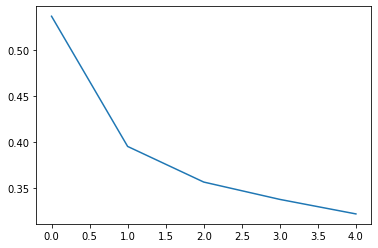

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.show()

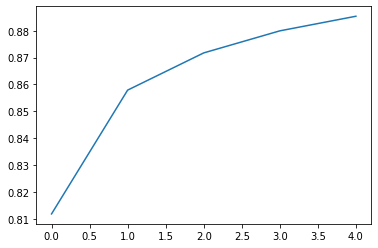

In [11]:
plt.plot(history.history['accuracy'])
plt.show()

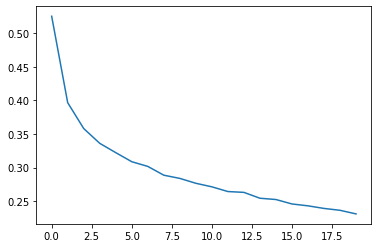

In [12]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0)
plt.plot(history.history["loss"])

In [13]:
model = model_fn()
model.compile(loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


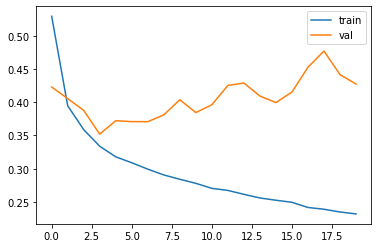

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "val"])
plt.show()

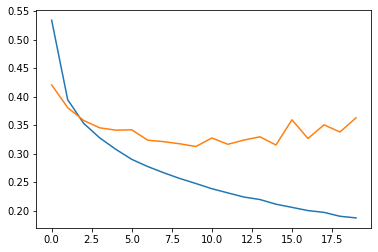

In [16]:
model = model_fn()
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data=(val_scaled, val_target))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [17]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


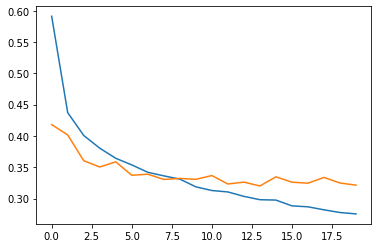

In [18]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
history = model.fit(train_scaled, train_target, epochs = 10, verbose =0, validation_data=(val_scaled, val_target))

In [20]:
model.save_weights("model-weights.h5")

In [21]:
model.save("model-whole.h5")

In [22]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Feb 22 06:29 model-weights.h5
-rw-r--r-- 1 root root 982664 Feb 22 06:29 model-whole.h5


In [23]:
model= model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5")

In [ ]:
# def model_fn(a_layer = None):
#   model = keras.Sequential()
#   model.add(keras.layers.Flatten(input_shape = (28,28)))
#   model.add(keras.layers.Dense(100, activation = "relu"))
#   if a_layer :
#     model.add(a_layer)
#   model.add(keras.layers.Dense(10, activation="softmax"))
#   return model

In [24]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights("model-weights.h5") 

In [25]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.8800833333333333


In [27]:
np.argmax(model.predict(val_scaled), axis = -1)

array([8, 8, 7, ..., 8, 8, 6])

In [28]:
np.argmax(model.predict(val_scaled), axis = 0)

array([ 1992,    16,  6812,  6427,   327,    33,  3087,  1962,    37,
       10266])

In [29]:
np.argmax(model.predict(val_scaled), axis = 1)

array([8, 8, 7, ..., 8, 8, 6])

In [30]:
model = keras.models.load_model("model-whole.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8801


[0.3234294056892395, 0.8800833225250244]

콜백은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들.

ModelCheckpoint콜백은 기본적으로 최상의 검증 점수를 만드는 모델을 저

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5")
model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])

In [33]:
model = keras.models.load_model("best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8830


[0.329706609249115, 0.8830000162124634]

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

In [35]:
print(early_stopping_cb.stopped_epoch)

12


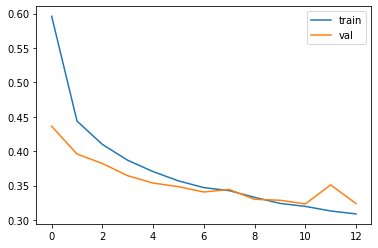

In [36]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","val"])
plt.show()

In [37]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8834


[0.32328659296035767, 0.8834166526794434]